<h1>Catalog</h1>
- Introduction <br>
- Data Set <br>
- EDA<br>
- Feature Engineering/Selectionv<br>
- Model & Result review<br>
- Interpetration<br>
- Conlcusion<br>


In [69]:
!pip install missingno

In [70]:
# we import the necessary libraries
import torch 
import matplotlib.pyplot as plt
import pandas as pd
import numpy
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.impute import KNNImputer
import seaborn as sns
from sklearn.model_selection import cross_val_score
from pandas.plotting import scatter_matrix
import missingno as msno

In [ ]:
# Load the data:
raw_data = pd.read_csv('diabetes.csv')
raw_data

In [ ]:
# Data Cleaning:
# we check for missing values
missing_values = ["", "nan", "Null", "null"]
filtered_raw_data = raw_data.drop_duplicates()
filtered_raw_data = filtered_raw_data.replace(missing_values, numpy.nan)
filtered_raw_data = filtered_raw_data.dropna()
filtered_raw_data.shape 


In [ ]:
filtered_raw_data[filtered_raw_data == 0].drop("Outcome", axis=1).count()


In [73]:
# use knn to impute the missing values in the diabetes dataset
# change all the 0 values in the columsn excepting pregenancies and Outcome to nan
filtered_raw_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = filtered_raw_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, numpy.nan)
filtered_raw_data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

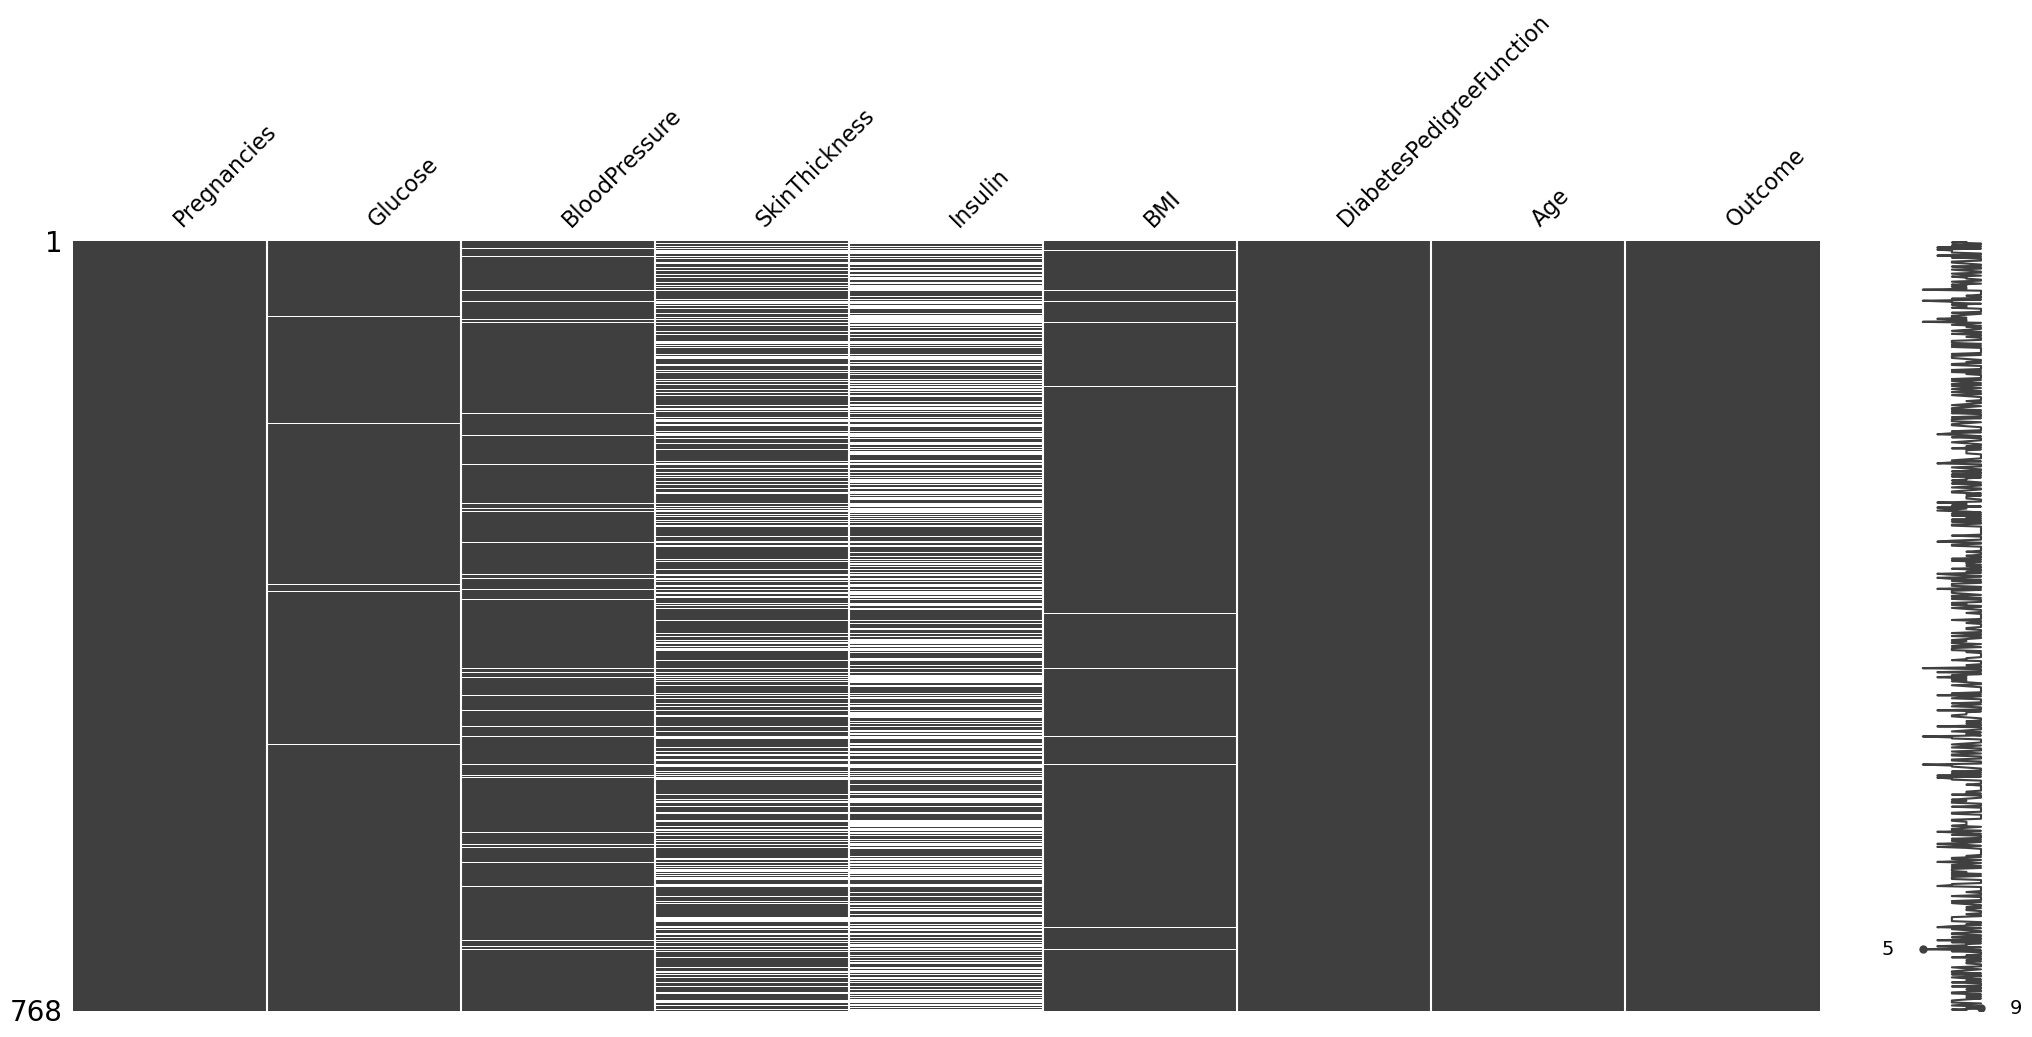

In [74]:
msno.matrix(filtered_raw_data)

<p>Interpretation:</p>

<h1>EDA Process</h1>

<p>We will need to present different form of EDA according to the different missing values handling methods</p>

In [ ]:
sns.countplot(x='Outcome', hue="Outcome", data=raw_data, palette="Set1", legend=False)


<p>Here, 0 represent the people who do not have diabetes in the raw data, and 1 represents people who have diabetes. It can derived from this that the dataset has a mild case of unbalance.</p>

<h2>Knn Impute Method</h2>

In [ ]:
imputer = KNNImputer(n_neighbors=5)
knn_imputed = pd.DataFrame(imputer.fit_transform(filtered_raw_data), columns=filtered_raw_data.columns)
knn_imputed

In [ ]:
knn_imputed.describe()


In [ ]:
# Histograms for numerical columns
knn_imputed.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(knn_imputed.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.boxplot(x='Glucose', data=knn_imputed)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure', data=knn_imputed)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin', data=knn_imputed)
plt.subplot(3,3,4)
sns.boxplot(x='BMI', data=knn_imputed)
plt.subplot(3,3,5)
sns.boxplot(x='Age', data=knn_imputed)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness', data=knn_imputed)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies', data=knn_imputed)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction', data=knn_imputed)

In [ ]:
scatter_matrix(knn_imputed, figsize=(20,20))
sns.pairplot(knn_imputed, hue='Outcome', diag_kind='kde')

<h2>Mix use of Median and Mean</h2>

In [47]:
meanMax_imputed = filtered_raw_data.copy()

In [ ]:
# Histograms for numerical columns
meanMax_imputed.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
# sns.heatmap(meanMax_imputed.corr(), annot=True, fmt=".2f")
# plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Imputing NaN values in features(columns) according their distribution
meanMax_imputed['Glucose'].fillna(meanMax_imputed['Glucose'].mean(), inplace=True)
meanMax_imputed['BloodPressure'].fillna(meanMax_imputed['BloodPressure'].mean(), inplace=True)
meanMax_imputed['SkinThickness'].fillna(meanMax_imputed['SkinThickness'].median(), inplace=True)
meanMax_imputed['BMI'].fillna(meanMax_imputed['BMI'].median(), inplace=True)
meanMax_imputed['Insulin'].fillna(meanMax_imputed['Insulin'].median(), inplace=True)

In [ ]:

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(meanMax_imputed.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.boxplot(x='Glucose', data=meanMax_imputed)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure', data=meanMax_imputed)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin', data=meanMax_imputed)
plt.subplot(3,3,4)
sns.boxplot(x='BMI', data=meanMax_imputed)
plt.subplot(3,3,5)
sns.boxplot(x='Age', data=meanMax_imputed)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness', data=meanMax_imputed)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies', data=meanMax_imputed)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction', data=meanMax_imputed)

In [ ]:
meanMax_imputed.describe()

In [ ]:
scatter_matrix(meanMax_imputed, figsize=(20,20))
sns.pairplot(meanMax_imputed, hue='Outcome', diag_kind='kde')

<h4>>>KNN</h4>

<h3>Another method to handle missing values</h3>

In [15]:
meanMax_imputed_2 = filtered_raw_data.copy()

In [ ]:
# Changing 0 values with NaN
meanMax_imputed_2[['Insulin', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI']] = meanMax_imputed_2[['Insulin', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI']].replace(0, numpy.NaN)
meanMax_imputed_2.isnull().sum()



In [18]:
def median_target(column):   
    temp = meanMax_imputed_2[meanMax_imputed_2[column].notnull()]
    temp = temp[[column, 'Outcome']].groupby(['Outcome'])[[column]].median().reset_index()
    return temp

In [20]:
meanMax_imputed_2.loc[(meanMax_imputed_2['Outcome'] == 0 ) & (meanMax_imputed_2['Insulin'].isnull()), 'Insulin'] = 102.5
meanMax_imputed_2.loc[(meanMax_imputed_2['Outcome'] == 1 ) & (meanMax_imputed_2['Insulin'].isnull()), 'Insulin'] = 169.5

meanMax_imputed_2.loc[(meanMax_imputed_2['Outcome'] == 0 ) & (meanMax_imputed_2['Glucose'].isnull()), 'Glucose'] = 107
meanMax_imputed_2.loc[(meanMax_imputed_2['Outcome'] == 1 ) & (meanMax_imputed_2['Glucose'].isnull()), 'Glucose'] = 140

meanMax_imputed_2.loc[(meanMax_imputed_2['Outcome'] == 0 ) & (meanMax_imputed_2['SkinThickness'].isnull()), 'SkinThickness'] = 27
meanMax_imputed_2.loc[(meanMax_imputed_2['Outcome'] == 1 ) & (meanMax_imputed_2['SkinThickness'].isnull()), 'SkinThickness'] = 32

meanMax_imputed_2.loc[(meanMax_imputed_2['Outcome'] == 0 ) & (meanMax_imputed_2['BloodPressure'].isnull()), 'BloodPressure'] = 70
meanMax_imputed.loc[(meanMax_imputed_2['Outcome'] == 1 ) & (meanMax_imputed_2['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

meanMax_imputed_2.loc[(meanMax_imputed_2['Outcome'] == 0 ) & (meanMax_imputed_2['BMI'].isnull()), 'BMI'] = 30.1
meanMax_imputed_2.loc[(meanMax_imputed_2['Outcome'] == 1 ) & (meanMax_imputed_2['BMI'].isnull()), 'BMI'] = 34.3


median_target('Insulin')
median_target('Glucose')
median_target('SkinThickness')
median_target('BloodPressure')
median_target('BMI')


In [ ]:
meanMax_imputed_2.isnull().sum()

In [ ]:

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(meanMax_imputed_2.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.boxplot(x='Glucose', data=meanMax_imputed_2)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure', data=meanMax_imputed_2)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin', data=meanMax_imputed_2)
plt.subplot(3,3,4)
sns.boxplot(x='BMI', data=meanMax_imputed_2)
plt.subplot(3,3,5)
sns.boxplot(x='Age', data=meanMax_imputed_2)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness', data=meanMax_imputed_2)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies', data=meanMax_imputed_2)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction', data=meanMax_imputed_2)

In [ ]:
meanMax_imputed_2.describe().T

In [ ]:
scatter_matrix(meanMax_imputed_2, figsize=(20,20))
sns.pairplot(meanMax_imputed_2, hue='Outcome', diag_kind='kde')

<h2>Feature Selection</h2>

In [ ]:
# we have above 3 different data that were handled with different methods
# They are:
# - knn_imputed
# - meanMax_imputed
# - meanMax_imputed_2

# Now we will proceed to do some feature selection

print(correlations['Outcome'].sort_values(ascending=False))
model = RandomForestClassifier()
X = dataCopy_approach2.drop('Outcome',axis='columns')
y = dataCopy_approach2['Outcome']

model.fit(X, y)

feature_importances = model.feature_importances_

feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
print(feature_importances_df)

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

# Get feature selection results
selected_features = X.columns[rfe.support_]  # Selected features
feature_ranking = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')

# Print results
print("Selected Features:")
print(selected_features)

print("\nFeature Ranking:")
print(feature_ranking)

In [ ]:
# droped_features = ['Pregnancies','BloodPressure', 'DiabetesPedigreeFunction']
droped_features = ['Pregnancies','BloodPressure', 'DiabetesPedigreeFunction']
dataCopy_selected = dataCopy_approach2.drop(droped_features, axis='columns')
dataCopy_selected.head()

<h3>Handling Outliers</h3>

<h2>Feature Engineering</h2>

In [ ]:
# We will create a new col to predict also whether a patient is prediabeteic or not, meaning you can be non diabetic, pre-diabetic, and diabetic
# we defined what the thresshold of prediabtetic, need source

<h2>Model Training</h2>

<h3>Random Forest</h3>

<h4>>>KNN</h4>

In [ ]:
# Split the data into features and target
X = knn_imputed.drop('Outcome', axis=1)
y = knn_imputed['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)


scores = cross_val_score(model, X, y, cv=5, scoring='recall')
print(scores)

print(scores.mean())

<h4>>>Mean Median</h4>




In [ ]:
# Split the data into features and target
X = meanMax_imputed.drop('Outcome', axis=1)
y = meanMax_imputed['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)


scores = cross_val_score(model, X, y, cv=5, scoring='recall')
print(scores)

print(scores.mean())

<h4>>>Other</h4>

In [ ]:
# Split the data into features and target
X = meanMax_imputed_2.drop('Outcome', axis=1)
y = meanMax_imputed_2['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)


scores = cross_val_score(model, X, y, cv=5, scoring='recall')
print(scores)

print(scores.mean())

<h3>SVM</h3>

<h4>>>KNN Impute</h4>

In [ ]:
# We use SVM to classify the diabetes dataset

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Train the model
X = knn_imputed.drop('Outcome', axis=1)
y = knn_imputed['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

#cross validation
scores = cross_val_score(model, X, y, cv=5, scoring='recall')
print(scores)


<h4>>>Mean Median</h4>




<h4>>>Other</h4>

<h3>Gradient Boosting</h3>

In [ ]:
# We use Gradient Boosting to classify the diabetes dataset

from sklearn.ensemble import GradientBoostingClassifier

# Train the model
X = knn_imputed.drop('Outcome', axis=1)
y = knn_imputed['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

scores = cross_val_score(model, X, y, cv=5, scoring='recall')
print(scores)


<h4>>>Mean Median</h4>




<h4>>>Other</h4>

<h3>Linear Regression</h3>

In [ ]:
# We use linear regression to classify the diabetes dataset

from sklearn.linear_model import LogisticRegression

# Train the model
X = knn_imputed.drop('Outcome', axis=1)
y = knn_imputed['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

scores = cross_val_score(model, X, y, cv=5, scoring='recall')

print(scores)



<h4>>>Mean Median</h4>




<h4>>>Other</h4>

<h1>Interpretation Of Result</h1>